In [2]:
import pandas as pd
import numpy as np
import test_stats as ts
from scipy.stats import mannwhitneyu
import funciones_hidrologicas as fh
import matplotlib.pyplot as plt
import os 

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
path = r'C:\Users\F-8143\OneDrive - SHI S.A.S\Libreria_hidrologia\datos_prueba'
archivos = [os.path.join(path,file) for file in os.listdir(path)]

df = [fh.read_data(archivo) for archivo in archivos]


In [5]:
dfs = []
for df_ in df:

    df_fix = df_[(df_.index > '1995') & (df_.index < '2020')]
    dfs.append(df_fix)

    

In [6]:
datos = pd.concat(dfs,axis=1)

In [9]:
cols = datos.columns

In [58]:
coord = fh.info_estacion(datos[cols[0]],cols[0])

In [63]:
coord

{'Nombre': 'ARGELIA [23055070]',
 'Y': 5.73,
 'X': -75.14,
 'altitud': 1755,
 'pptn_media_anual': 5114.604545454546}

In [64]:
df = pd.DataFrame.from_dict([coord])

In [65]:
df

,Nombre,Y,X,altitud,pptn_media_anual
0,ARGELIA [23055070],5.73,-75.14,1755,5114.604545


In [71]:
gdf = fh.shape_estaciones(df)

In [72]:
gdf

,Nombre,Y,X,altitud,pptn_media_anual,geometry
0,ARGELIA [23055070],2.191596e+06,4.763094e+06,1755,5114.604545,POINT (4763093.962 2191596.285)


In [15]:
datos[cols[0]]

1995-01-01 07:00:00     NaN
1995-01-02 07:00:00     NaN
1995-01-03 07:00:00     NaN
1995-01-04 07:00:00     NaN
1995-01-05 07:00:00     NaN
                       ... 
2019-12-27 07:00:00     0.0
2019-12-28 07:00:00     0.0
2019-12-29 07:00:00     7.6
2019-12-30 07:00:00    18.9
2019-12-31 07:00:00     0.0
Freq: D, Name: 23055070, Length: 9131, dtype: float64

In [1]:
import re

text = "(0.81378611, -77.66197778)"
pattern = r'-?\d+\.\d+'
numbers = re.findall(pattern, text)

print(numbers)


['0.81378611', '-77.66197778']


In [115]:
rellenos = fh.razon_normal(datos)

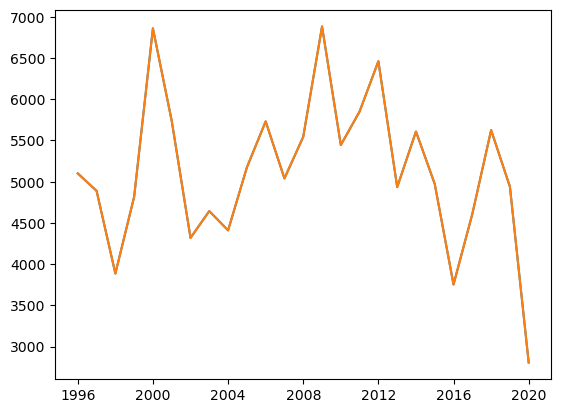

In [117]:
plt.plot(rellenos['23055070'].resample('YE').sum())
plt.plot(datos['23055070'].resample('YE').sum())

In [45]:
# Prueba de llenado de estaciones
datos_kel = pd.read_excel('Datosllenado-Juli.xlsx',index_col='Fecha')

In [37]:
datos_completos = fh.razon_normal(datos_kel)

In [39]:
datos_completos.columns

Index(['COTOVE', 'LLANOS', 'OLAYA', 'SABANALARGA'], dtype='object')

In [53]:
datos_kel.isna().resample('YE').sum()[]

,COTOVE,LLANOS,OLAYA,SABANALARGA
Fecha,,,,
1977-12-31,31,365,0,0
1978-12-31,0,365,0,0
1979-12-31,1,365,0,0
1980-12-31,92,366,0,0
1981-12-31,3,365,0,0
1982-12-31,0,365,99,0
1983-12-31,14,365,0,8
1984-12-31,0,366,0,0
1985-12-31,31,365,0,0


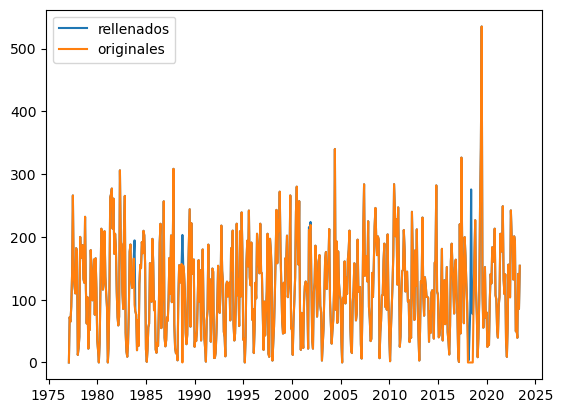

In [56]:
plt.plot(datos_completos['SABANALARGA'].resample('ME').sum(),label='rellenados')
plt.plot(datos_kel['SABANALARGA'].resample('ME').sum(),label='originales')
plt.legend()